In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from collections import Counter
import geopandas as gpd

In [3]:
fm.fontManager.addfont(path = "./font/NanumGothic.ttf")
matplotlib.rcParams["font.family"] = "NanumGothic"

In [4]:
df1 = pd.read_csv("./csv/경상남도인허가문화관광시설.csv" , encoding = "EUC-KR")
df1 = df1[df1["영업상태"] == "영업/정상"]
df1 = df1.reset_index()

# 경남면적 : 10542.54k㎡
print(f"경상남도 인허가 문화관광시설 수 : {len(df1)}")
print(f"경상남도 면적 : 10542.54k㎡")
print(f"경상남도 면적당 문화관광시설 비율 : {len(df1) / 10542.54}")
print("경상남도는 1k㎡당 약 0.03개의 문화관광시설이 있다.")

경상남도 인허가 문화관광시설 수 : 362
경상남도 면적 : 10542.54k㎡
경상남도 면적당 문화관광시설 비율 : 0.03433707626435375
경상남도는 1k㎡당 약 0.03개의 문화관광시설이 있다.


In [5]:
df2 = pd.read_csv("./csv/부산인허가문화관광시설.csv")
df2 = df2[df2["영업상태"] == "영업/정상"]
df2 = df2.reset_index()

# 부산면적 : 771.31k㎡
print(f"부산 인허가 문화관광시설 수 : {len(df2)}")
print(f"부산 면적 : 771.31k㎡")
print(f"부산 면적당 문화관광시설 비율 : {len(df2) / 771.31}")
print("부산은 1k㎡당 약 0.44개의 문화관광시설이 있다.")

부산 인허가 문화관광시설 수 : 338
부산 면적 : 771.31k㎡
부산 면적당 문화관광시설 비율 : 0.4382155034940556
부산은 1k㎡당 약 0.44개의 문화관광시설이 있다.


In [6]:
addr = []

for i in range(len(df1["지번주소"])):
    if df1["지번주소"][i][:4] == "경상남도":
        if df1["지번주소"][i][:8] != "경상남도 창원시":
            addr.append(df1["지번주소"][i][:8])
        else :
            if df1["지번주소"][i][:df1["지번주소"][i].find("구") + 1] == '':
                addr.append("경상남도 창원시 성산구")
            else:
                addr.append(df1["지번주소"][i][:df1["지번주소"][i].find("구") + 1])

addr[295] = "경상남도 창원시 마산회원구"

In [9]:
counter = Counter(addr)
count_addr = dict(counter)

df3 = pd.DataFrame([count_addr])
df3 = df3.T
df3 = df3.reset_index()
df3.columns = ["시군구", "문화관광시설수"]
for i in range(len(df3["시군구"])):
    df3.loc[i, "시군구"] = df3["시군구"][i].replace("경상남도 ", "")

df3

,시군구,문화관광시설수
0,거제시,28
1,하동군,13
2,통영시,9
3,창원시 진해구,13
4,합천군,5
5,김해시,55
6,진주시,26
7,창녕군,15
8,사천시,7
9,창원시 성산구,15


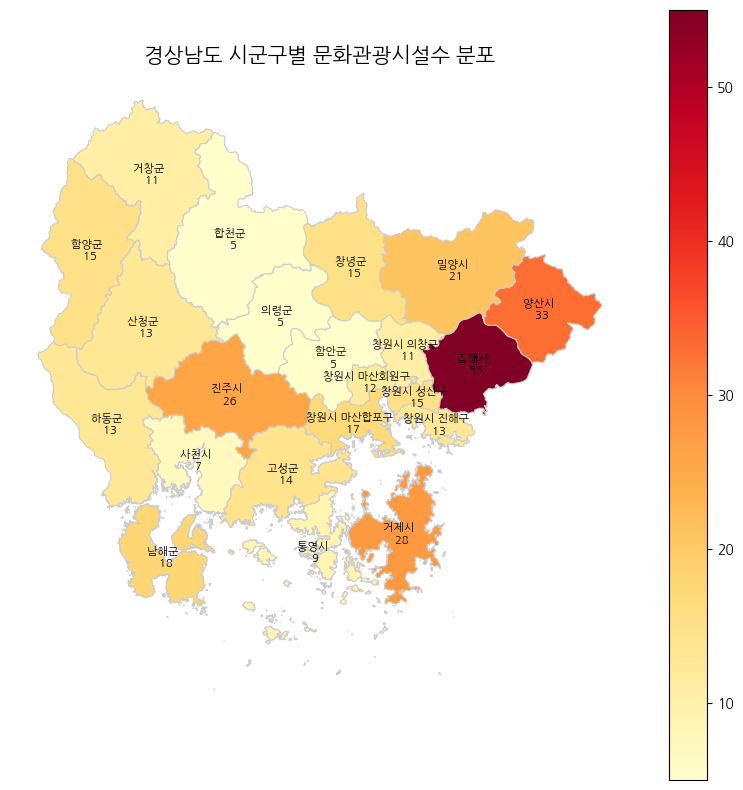

In [8]:
gdf = gpd.read_file("./shp/경상남도_시군구.shp")
gdf
    
merged = gdf.merge(df3, left_on = "SIG_KOR_NM", right_on = "시군구")
fig, ax = plt.subplots(figsize = (10, 10))
merged.plot(
    column = "문화관광시설수",
    cmap = "YlOrRd",
    linewidth = 0.8,
    ax = ax,
    edgecolor = "0.8",
    legend = True
)
for i, row in gdf.iterrows():
    # print(i, row)
    center = row["geometry"].centroid
    ax.text(center.x, center.y, f"{row['SIG_KOR_NM']} \n {merged['문화관광시설수'][i]}" , fontsize = 8, ha = "center", va = "center", color = "black")
plt.title("경상남도 시군구별 문화관광시설수 분포", fontsize = 15)
plt.axis("off")
plt.savefig("./img/culturalflex.png")
plt.show()